In [ ]:
#Fire Vs No Fire with VGG16

##Below two classes will be used to connect google drive
import os
from google.colab import drive
#Numpy array
import numpy as np

#Import pyplot for graph
from matplotlib import pyplot
import matplotlib.pyplot as plt

#Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
#Import Tensorflow to manipulate layers
from tensorflow.keras import layers

#Import Pillow for loading images 
from PIL import Image

#Data augmentation
data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.1),
        ]
    )



In [ ]:
#Mount the google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#For fire and no fire training files
#0.8 for training and 0.2 for validation 

In [ ]:
#Load the train dataset from Tensorflow and use it 80% of the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training", validation_split=0.2, subset="training", seed=1337,batch_size=32,image_size=(254,254), shuffle=True)

Found 39375 files belonging to 2 classes.
Using 31500 files for training.


In [ ]:
#Load the train dataset from Tensorflow and use it 20% of the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Training", validation_split=0.2, subset="validation", seed=1337,image_size=(254,254),
        batch_size=32, shuffle=True)

Found 39375 files belonging to 2 classes.
Using 7875 files for validation.


In [ ]:
#Import VGG16, 
from tensorflow.keras.applications import VGG16
#Import Dense, Input, Flatten
from tensorflow.keras.layers import Dense, Input, Flatten
#Import the model
from tensorflow.keras import Model
#Set the input shape to 254,254,3. 
img_input = Input(shape=(254, 254, 3))

In [ ]:
#Set the VGG16 model
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")

##Show the architecture of the model
model.summary()

553467904/553467096 [==============================] - 10s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
___________________________________________________________

In [ ]:
#Gets the last layer 
last_layer = model.get_layer('block5_pool').output
#Unfreeze the the the layers layers after the layer "block5_pool"
#Flattens the layer
x= Flatten(name='flatten')(last_layer)
#Gets the dense layer and there will be 128 layers
x = Dense(128, activation='relu', name='fc1')(x)
#Gets the dense layer and there will be 64 layers
x = Dense(64, activation='relu', name='fc2')(x)
#Make the sigmoid function for classification
out = Dense(1, activation='sigmoid', name='output')(x)  
#Creates the model
model = Model(img_input, out)

#Freeze the rest of the layers
for layer in model.layers[:-3]:
	layer.trainable = False

#Shows the architecture of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 254, 254, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 254, 254, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 254, 254, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 63, 63, 128)       0     

In [ ]:
#Compiles the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
#
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16__model.h5', save_best_only=True),
]

In [ ]:
#Trains the model
history = model.fit(train_ds,steps_per_epoch=10,
                              epochs = 14,
                              validation_data=val_ds,
                              batch_size=32,verbose = 1)

RuntimeError: ignored

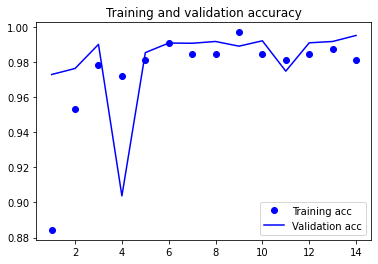

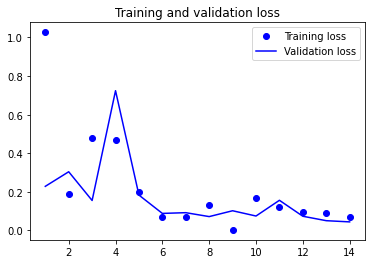

In [ ]:
#This graphic was taken from Lab 7 from the CE888 Data Science and Decision Making Class
#Also or detailed documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#Gets the history of the accuracy
acc = history.history['acc']
#Gets the history of the validation accuracy
val_acc = history.history['val_acc']
#Gets the history of the loss
loss = history.history['loss']
#Gets the history of the validation loss
val_loss = history.history['val_loss']

#Gets the number of the epochs
epochs = range(1, len(acc) + 1)

#Create the line x = epochs, y = acc 'bo' as blue marker, label show label 
#down right below in plt.legend() method for Training acc
plt.plot(epochs, acc, 'bo', label='Training acc')
#Create the line x = epochs, y = acc 'bo' as blue line, label show label 
#down right below in plt.legend() method  for Validation acc
plt.plot(epochs, val_acc, 'b', label='Validation acc')
#Show the title of the graph
plt.title('Training and validation accuracy')
#Show the legend which will show the label
plt.legend()

#Create the figure for new graph 
plt.figure()

##Create the line x = epochs, y = acc 'bo' as blue marker, label show label 
#down right below in plt.legend() method Training loss
plt.plot(epochs, loss, 'bo', label='Training loss')
##Create the line x = epochs, y = acc 'bo' as blue marker, label show label 
#down right below in plt.legend() method Validation loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')
##Show the title of the graph
plt.title('Training and validation loss')
#Show the legend which will show the label
plt.legend()

#Show the graphs
plt.show()

In [ ]:
#Create test dataset tensorflow
test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/gdrive/MyDrive/Colab_Notebooks/CEProje/Test", seed=1337, image_size=(254,254), batch_size=32, shuffle=True)

Found 8618 files belonging to 2 classes.


In [ ]:
#Test the accuracy with test classes
loss, accuracy = model.evaluate(test_fire_ds)
print("Accuracy", accuracy)

270/270 [==============================] - 61s 226ms/step - loss: 2.7518 - acc: 0.7785
Accuracy 0.7784869074821472
